# 219 IPython

https://ipython.org/

In [2]:
# pip install ipython

# magic keyword
%quickref


IPython -- An enhanced Interactive Python - Quick Reference Card

obj?, obj??      : Get help, or more help for object (also works as
                   ?obj, ??obj).
?foo.*abc*       : List names in 'foo' containing 'abc' in them.
%magic           : Information about IPython's 'magic' % functions.

Magic functions are prefixed by % or %%, and typically take their arguments
without parentheses, quotes or even commas for convenience.  Line magics take a
single % and cell magics are prefixed with two %%.

Example magic function calls:

%alias d ls -F   : 'd' is now an alias for 'ls -F'
alias d ls -F    : Works if 'alias' not a python name
alist = %alias   : Get list of aliases to 'alist'
cd /usr/share    : Obvious. cd -<tab> to choose from visited dirs.
%cd??            : See help AND source for magic %cd
%timeit x=10     : time the 'x=10' statement with high precision.
%%timeit x=2**100
x**100           : time 'x**100' with a setup of 'x=2**100'; setup code is not
                   co

In [4]:
import os

os.path.join?

Signature: os.path.join(a, *p)
Docstring:
Join two or more pathname components, inserting '/' as needed.
If any component is an absolute path, all previous path components
will be discarded.  An empty last part will result in a path that
ends with a separator.
File:      ~/opt/anaconda3/lib/python3.8/posixpath.py
Type:      function


# 220 contextlib.contextamanager

In [9]:
# 데코레이터 패턴
def tag(f):
    def _wrapper(content):
        print('<h2>')
        r = f(content)
        print('</h2>')
        return r
    return _wrapper

@tag
def f(content):
    print(content)
    

f('test')

<h2>
test
</h2>


In [11]:
def tag(name):
    def _tag(f):
        def _wrapper(content):
            print(f'<{name}>')
            r = f(content)
            print(f'</{name}>')
            return r
        return _wrapper
    return _tag

@tag('h2')
def f(content):
    print(content)
    

f('test')

<h2>
test
</h2>


In [12]:
import contextlib

@contextlib.contextmanager
def tag(name):
    print(f'<{name}>')
    yield
    print(f'</{name}>')

    
@tag('h2')
def f(context):
    print(context)
    
f('test')

<h2>
test
</h2>


In [18]:
import contextlib

@contextlib.contextmanager
def tag(name):
    print(f'<{name}>')
    yield
    print(f'</{name}>')


def f():
    with tag('h2'):
        print('test')
        with tag('h5'):
            print('test2')

f()

<h2>
test
<h5>
test2
</h5>
</h2>


# 221 contextlib.ContextDecorator

In [22]:
import contextlib

# @contextlib.contextmanager
# def tag(name):
#     print(f'<{name}>')
#     yield
#     print(f'</{name}>')

class tag(contextlib.ContextDecorator):
    def __init__(self, name):
        self.name = name
        self.start_tag = f'<{name}>'
        self.end_tag = f'</{name}>'
        
    def __enter__(self):
        print(self.start_tag)
        
    def __exit__(self, exc_type, exc_val, exc_tb):
#         print(exc_type)
#         print(exc_val)
#         print(exc_tb)
        
        print(self.end_tag)

with tag('h2'):
#     raise Exception('error')
    print('test')

<h2>
test
</h2>


# 222. contextlib.suppress

In [24]:
import contextlib
import os

try:
    os.remove('somefile.tmp')
except FileNotFoundError:
    pass

In [25]:
import contextlib
import os

with contextlib.suppress(FileNotFoundError):
    os.remove('somefile.tmp')

# 223 contextlib.redirect_stdout, contextlib.redirect_sterr

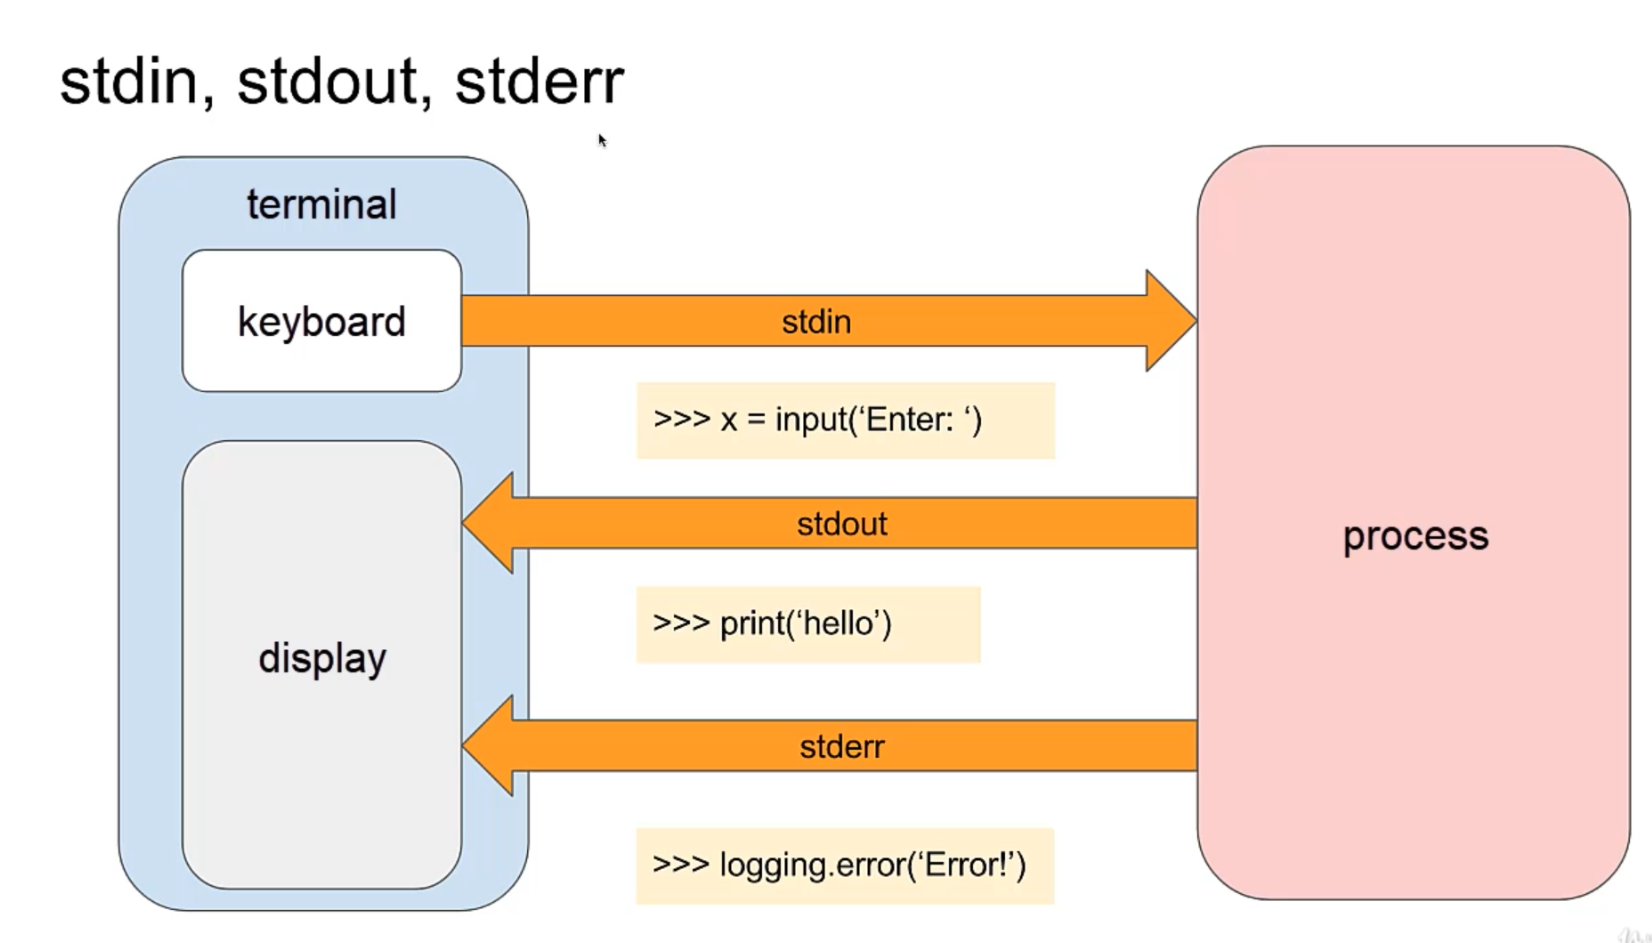

In [29]:
import sys

x = input('Enter:')
print(x)

# for line in sys.stdin:
#     print(line)
    

Enter: test


test


In [30]:
print('hello')

sys.stdout.write('hello')

hello
hello

In [31]:
import logging
import sys

logging.error('Error!')
sys.stderr.write('Error!')

ERROR:root:Error!
Error!

In [33]:
import contextlib

with open('stdout.log', 'w') as f:
    with contextlib.redirect_stdout(f):
        print('hello')

In [34]:
import contextlib

with open('stdout.log', 'w') as f:
    with contextlib.redirect_stdout(f):
        help(sys.stdout)

In [36]:
import contextlib

# jupyter 에서 작동 안함
with open('stderr.log', 'w') as f:
    with contextlib.redirect_stderr(f):
        logging.error('Error!')

ERROR:root:Error!


# 224. contextlib.ExitStack

In [48]:
def is_ok_job():
    try:
        print('do something')
        raise Exception('error')
        return True
    except Exception:
        return False
    
def cleanup():
    print('clean up')

try:
    is_ok = is_ok_job()
    print('more task')
finally:
    if not is_ok:
        cleanup()

do something
more task
clean up


In [47]:
import contextlib

def is_ok_job():
    try:
        print('do something')
        raise Exception('error')
        return True
    except Exception:
        return False
    
def cleanup():
    print('clean up')

def cleanup2():
    print('clean up2')


with contextlib.ExitStack() as stack:
    stack.callback(cleanup)
    stack.callback(cleanup2)
    
    @stack.callback
    def cleanup3():
        print('clean up3')

    is_ok = is_ok_job()
    print('more task')

#     if is_ok:
#         stack.pop_all()


do something
more task
clean up3
clean up2
clean up


# 225 io 스트림

In [49]:
with open('/tmp/a.txt', 'w') as f:
    f. write('test test')
    
with open('/tmp/a.txt', 'r') as f:
    print(f.read())
    

test test


In [50]:
import io

f = io.StringIO()
f.write('string io test')
f.seek(0)
print(f.read())

string io test


In [53]:
import io

f = io.BytesIO()
f.write(b'string io test')
f.seek(0)
print(f.read())

b'string io test'


In [70]:
import io
import requests
import tarfile
import zipfile

url = 'https://files.pythonhosted.org/packages/59/b8/adeb445fa6c636f78c532f0dd6f847f0f90e709afa7d41396181d438be5a/setuptools-58.1.0.tar.gz'

f = io.BytesIO()
r = requests.get(url)
f.write(r.content)

# Error 발생 Empty?
with tarfile.open(fileobj=f, mode='r:gz') as tar:
    print(tar.getmembers())
#     with tar.open('setuptools-58.1.0/README.rst') as r:
#         print(r.read().decode())
    

# 에시는 Zip 파일
# with zipfile.ZipFile(f) as z:
#     with z.open('setuptools-58.1.0/README.rst') as r:
#         print(r.read().decode())


ReadError: empty file

# 226 collections.ChainMap : 복잡한 Dict 다룰때

In [73]:
a = {'a': 'a', 'c':'c', 'num':0}
b = {'b': 'b', 'c':'cc'}
c = {'b': 'bbb', 'c': 'ccc'}

print(a)
a.update(b)
print(a)
a.update(c)
print(a)

{'a': 'a', 'c': 'c', 'num': 0}
{'a': 'a', 'c': 'cc', 'num': 0, 'b': 'b'}
{'a': 'a', 'c': 'ccc', 'num': 0, 'b': 'bbb'}


In [84]:
import collections

a = {'a': 'a', 'c':'c', 'num':0}
b = {'b': 'b', 'c':'cc'}
c = {'b': 'bbb', 'c': 'ccc'}

m = collections.ChainMap(a, b, c)
print(m)
print(m.maps)
print(m['c'])
m.maps.reverse()
print(m.maps)
print(m['c'])
m.maps.insert(0, {'c':'ccccc'})
print(m.maps)
print(m['c'])
del m.maps[0]
print(m.maps)
print(m['c'])
m['b'] = 'BBBBBB'
print(m.maps)

ChainMap({'a': 'a', 'c': 'c', 'num': 0}, {'b': 'b', 'c': 'cc'}, {'b': 'bbb', 'c': 'ccc'})
[{'a': 'a', 'c': 'c', 'num': 0}, {'b': 'b', 'c': 'cc'}, {'b': 'bbb', 'c': 'ccc'}]
c
[{'b': 'bbb', 'c': 'ccc'}, {'b': 'b', 'c': 'cc'}, {'a': 'a', 'c': 'c', 'num': 0}]
ccc
[{'c': 'ccccc'}, {'b': 'bbb', 'c': 'ccc'}, {'b': 'b', 'c': 'cc'}, {'a': 'a', 'c': 'c', 'num': 0}]
ccccc
[{'b': 'bbb', 'c': 'ccc'}, {'b': 'b', 'c': 'cc'}, {'a': 'a', 'c': 'c', 'num': 0}]
ccc
[{'b': 'BBBBBB', 'c': 'ccc'}, {'b': 'b', 'c': 'cc'}, {'a': 'a', 'c': 'c', 'num': 0}]


In [90]:
import collections

a = {'a': 'a', 'c':'c', 'num':0}
b = {'b': 'b', 'c':'cc'}
c = {'b': 'bbb', 'c': 'ccc'}

class DeepChainMap(collections.ChainMap):
    def __setitem__(self, key, value):
        for mapping in self.maps:
            if key in mapping:
                if type(mapping[key]) is int and mapping[key] < value:
                    mapping[key] = value
                return
        self.maps[0][key] = value
        
m = DeepChainMap(a, b, c)
m['num'] = -1
print(m['num'])

m['newnum'] = 1
print(m['newnum'])


0
1


# 227 collections.defaultdict

In [2]:
d = {}
l = ['a', 'a', 'a', 'b', 'b', 'c']
for word in l:
    if word not in d:
        d[word] = 0
    d[word] += 1
print(d)

{'a': 3, 'b': 2, 'c': 1}


In [5]:
l = ['a', 'a', 'a', 'b', 'b', 'c']
for word in l:
    d.setdefault(word, 0)
    d[word] += 1

print(d)

{'a': 6, 'b': 4, 'c': 2}


In [6]:
import collections

d = collections.defaultdict(int)
l = ['a', 'a', 'a', 'b', 'b', 'c']
for word in l:
    d[word] += 1
print(d)

defaultdict(<class 'int'>, {'a': 3, 'b': 2, 'c': 1})


In [8]:
import collections

d = collections.defaultdict(set)
s = [('red', 1), ('blue', 2), ('red', 3), ('blue', 4),
     ('red', 1), ('blue', 4)]
for k, v in s:
    d[k].add(v)

print(d)

defaultdict(<class 'set'>, {'red': {1, 3}, 'blue': {2, 4}})


# 228 collections.Counter

In [11]:
l = ['a', 'a', 'a', 'b', 'b', 'c']
c = collections.Counter()
for word in l:
    c[word] += 1
print(c)
print(c.most_common(2))
print(c.values())
print(sum(c.values()))

Counter({'a': 3, 'b': 2, 'c': 1})
[('a', 3), ('b', 2)]
dict_values([3, 2, 1])
6


In [14]:
import re

with open('test.json', 'r') as f:
    words = re.findall(r'\w+', f.read().lower())
    print(collections.Counter(words).most_common(20))

[('id', 2), ('name', 2), ('employee', 1), ('111', 1), ('mike', 1), ('222', 1), ('nancy', 1)]


# 229 collections.deque

In [18]:
import collections
import queue

# Double-end queue
collections.deque

q = queue.Queue()
lq = queue.LifoQueue() # [1, 2, 3]
l = []
d = collections.deque() # 

for i in range(3):
    q.put(i)
    lq.put(i)
    l.append(i)
    d.append(i)
    
for _ in range(3):
    print(f'FIFO queue = {q.get()}')
    print(f'LIFO queue = {lq.get()}')
    print(f'list.      = {l.pop(0)}')
    print(f'deque.     = {d.popleft()}')
    print()

FIFO queue = 0
LIFO queue = 2
list.      = 0
deque.     = 0

FIFO queue = 1
LIFO queue = 1
list.      = 1
deque.     = 1

FIFO queue = 2
LIFO queue = 0
list.      = 2
deque.     = 2



In [23]:
import collections
import queue

# Double-end queue
collections.deque
d = collections.deque() # 

for i in range(3):
    d.append(i)


print(d)
d.rotate()
print(d)
d.rotate()
print(d)
d.rotate()
print(d)

d.extendleft('x')
print(d)

d.clear()
print(d)

deque([0, 1, 2])
deque([2, 0, 1])
deque([1, 2, 0])
deque([0, 1, 2])
deque(['x', 0, 1, 2])
deque([])


# 230 collections.namedtutple

In [28]:
p = (10, 20)
print(p[0])
# p[0] = 100 error

10


In [30]:
class Point(object):
    def __init__(self, x, y):
        self.x = x
        self.y = y

p = Point(10, 20)
print(p.x)

10


In [38]:
Point = collections.namedtuple('Point', ['x', 'y'])
p = Point(10, y = 20)
print(p.x)
# p.x = 100 Error

p1 = Point._make([100, 200])
print(p1)
print(p1._asdict())

p1._replace(x=500)
print(p1)
p2 = p1._replace(x=500)
print(p2)

10
Point(x=100, y=200)
{'x': 100, 'y': 200}
Point(x=100, y=200)
Point(x=500, y=200)


In [41]:
class SumPoint(collections.namedtuple('Point', ['x', 'y'])):
    @property
    def total(self):
        return self.x + self.y

p3 = SumPoint(2, 3)
print(p3.x, p3.y, p3.total)

2 3 5


In [42]:
import csv
import collections

with open('names.csv', 'w') as csvfile:
    fieldnames = ['first', 'last', 'address']
    writer = csv.DictWriter(csvfile, fieldnames= fieldnames)
    writer.writeheader()
    writer.writerow({'first':'Mike', 'last':'Jackson', 'address':'A'})
    writer.writerow({'first':'Jun', 'last':'Sakai', 'address':'B'})
    writer.writerow({'first':'Nancy', 'last':'Mask', 'address':'C'})

In [44]:
with open('names.csv', 'r') as f:
    csv_reader = csv.reader(f)
    Names = collections.namedtuple('Names', next(csv_reader))
    for row in csv_reader:
        names = Names._make(row)
        print(names.first, names. last, names.address)

Mike Jackson A
Jun Sakai B
Nancy Mask C


# 231. collections.OrderedDict, Python 3.6 dict

In [45]:
d = {'banana' : 3, 'apple' : 4, 'peer' : 1 , 'orange' : 2 }
print(d)

{'banana': 3, 'apple': 4, 'peer': 1, 'orange': 2}


In [53]:
import collections

d = {'banana' : 3, 'apple' : 4, 'peer' : 1 , 'orange' : 2 }
o = collections.OrderedDict(d)
print(o)
print(d == o)

OrderedDict([('banana', 3), ('apple', 4), ('peer', 1), ('orange', 2)])
True


In [55]:
import collections

od1 = collections.OrderedDict({'banana' : 3, 'apple' : 4, 'peer' : 1 , 'orange' : 2 })
od2 = collections.OrderedDict({'apple' : 4, 'banana' : 3, 'peer' : 1 , 'orange' : 2 })

print(od1 == od2)

False


In [59]:
import collections

d = {'banana' : 3, 'apple' : 4, 'peer' : 1 , 'orange' : 2 }
od1 = collections.OrderedDict(sorted(d.items(), key=lambda t: t[0]))
print(od1)
od2 = collections.OrderedDict(sorted(d.items(), key=lambda t: t[1]))
print(od2)
od3 = collections.OrderedDict(sorted(d.items(), key=lambda t: len(t[0])))
print(od3)

OrderedDict([('apple', 4), ('banana', 3), ('orange', 2), ('peer', 1)])
OrderedDict([('peer', 1), ('orange', 2), ('banana', 3), ('apple', 4)])
OrderedDict([('peer', 1), ('apple', 4), ('banana', 3), ('orange', 2)])


In [63]:
import collections

d = {'banana' : 3, 'apple' : 4, 'peer' : 1 , 'orange' : 2 }
od = collections.OrderedDict(sorted(d.items(), key=lambda t: t[0]))
print(od)
od['cc'] = 100
print(od)
od = collections.OrderedDict(sorted(od.items(), key=lambda t: t[0]))
print(od)

OrderedDict([('apple', 4), ('banana', 3), ('orange', 2), ('peer', 1)])
OrderedDict([('apple', 4), ('banana', 3), ('orange', 2), ('peer', 1), ('cc', 100)])
OrderedDict([('apple', 4), ('banana', 3), ('cc', 100), ('orange', 2), ('peer', 1)])


# 232 정규표현 re

https://docs.python.org/3/library/re.html

In [79]:
import re
"""
match()    문자열의 처음부터 정규식과 매치되는지 조사
search()   문자열 전체를 검색하여 정규식과 매치되는지 조사
findall()  정규식과 매치되는 모든 문자열을 리스트로 리턴
finditer() 정규식과 매치되는 모든 문자열을 iterator 객체로 리턴
"""

m = re.match('a.c', 'abc')
print(m)
print(m.group())
print()

m = re.search('a.c', 'test abc test abc')
print(m)
print(m.span())
print(m.group())
print()

m = re.findall('a.c', 'test abc test abc')
print(m)
print()

m = re.finditer('a.c', 'test abc test abc')
print([w.group() for w in m])


<re.Match object; span=(0, 3), match='abc'>
abc

<re.Match object; span=(5, 8), match='abc'>
(5, 8)
abc

['abc', 'abc']

['abc', 'abc']


In [88]:
import re

m = re.match('ab?', 'abb')    
print(m)
print()

m = re.match('ab*', 'abb')    
print(m)
print()

m = re.match('ab+', 'abbb')    
print(m)
print()

m = re.match('a{3}', 'aaaaa')    
print(m)
print()

m = re.match('a{2,4}', 'aaaaaa')    
print(m)
print()

<re.Match object; span=(0, 2), match='ab'>

<re.Match object; span=(0, 3), match='abb'>

<re.Match object; span=(0, 4), match='abbb'>

<re.Match object; span=(0, 3), match='aaa'>

<re.Match object; span=(0, 4), match='aaaa'>



In [122]:
import re

m = re.match('[a-c]', 'abc')    
print(m)
print()

m = re.match('[a-zA-Z]', 'abc')    
print(m)
print()

m = re.match('[0-9]', '1')    
print(m)
print()

m = re.match('\d', '0')
print(m)
print()

m = re.match('\w', 'arirang@')
print(m)
print()

m = re.match('[a-zA-Z0-9]', 'abc')    
print(m)
print()

m = re.match('\W', '@')
print(m)
print()

m = re.match('[^a-zA-Z0-9]', '@')    
print(m)
print()

m = re.match('[a|b]', 'b')    
print(m)
print()

m = re.match('(abc)+', 'abcabc')    
print(m)
print()

m = re.match('\s', ' ')    
print(m)
print()

m = re.match('\s', ' ')    
print(m)
print()

m = re.match('\S', '1')    
print(m)
print()

<re.Match object; span=(0, 1), match='a'>

<re.Match object; span=(0, 1), match='a'>

<re.Match object; span=(0, 1), match='1'>

<re.Match object; span=(0, 1), match='0'>

<re.Match object; span=(0, 1), match='a'>

<re.Match object; span=(0, 1), match='a'>

<re.Match object; span=(0, 1), match='@'>

<re.Match object; span=(0, 1), match='@'>

<re.Match object; span=(0, 1), match='b'>

<re.Match object; span=(0, 6), match='abcabc'>

<re.Match object; span=(0, 1), match=' '>

<re.Match object; span=(0, 1), match=' '>

<re.Match object; span=(0, 1), match='1'>



In [116]:
import re

m = re.match('\*', '*')    
print(m)
print()

m = re.match('\?', '?')    
print(m)
print()

<re.Match object; span=(0, 1), match='*'>

<re.Match object; span=(0, 1), match='?'>



In [121]:
import re

m = re.search('^abc', 'abctest abc')    
print(m)
print()

m = re.search('abc$', 'abctest abc')    
print(m)
print()

<re.Match object; span=(0, 3), match='abc'>

<re.Match object; span=(8, 11), match='abc'>



# 233 정규표현의 re.group re.compil, re.VERBOSE

In [143]:
import re

s = ('arn:aws:cloudformation:us-east-2:123456789012:stack/'
     'mystack-mynestedstack-sggfrhxhum7w/f448b250-b969011e0-a185-5081d0136786')

m = re.match(r'arn:aws:cloudformation:(?P<region>[\w-]+):(?P<account_id>[\d]+):stack/(?P<stack_name>[\w-]+)/[\w-]+', s)

if m:
    print(m.group('region'))
    print(m.group('account_id'))
    print(m.group('stack_name'))
else:
    raise Exception('Error')
    print(m)

us-east-2
123456789012
mystack-mynestedstack-sggfrhxhum7w


In [147]:
import re

#RE_STACK_ID = re.compile(r'arn:aws:cloudformation:(?P<region>[\w-]+):(?P<account_id>[\d]+):stack/(?P<stack_name>[\w-]+)/[\w-]+')
RE_STACK_ID = re.compile(r"""
    arn:aws:cloudformation:
    (?P<region>[\w-]+):
    (?P<account_id>[\d]+)
    :stack/
    (?P<stack_name>[\w-]+)
    /[\w-]+""", re.VERBOSE)

s1 = ('arn:aws:cloudformation:us-east-2:123456789012:stack/'
     'mystack-mynestedstack-sggfrhxhum7w/f448b250-b969011e0-a185-5081d0136786')
s2 = ('arn:aws:cloudformation:us-east-2:123456789012:stack/'
     'mystack-mynestedstack-sggfrhxhuaaa/f448b250-b969011e0-a185-5081d0136786')

for s in [s1, s2]:
    m = RE_STACK_ID.match(s)
    if m:
        print(m.group('region'))
        print(m.group('account_id'))
        print(m.group('stack_name'))

us-east-2
123456789012
mystack-mynestedstack-sggfrhxhum7w
us-east-2
123456789012
mystack-mynestedstack-sggfrhxhuaaa


# 234 정규표현의 re.split의 분활과 re.compile의 치환

In [149]:
s = 'My name is ... Mike'
print(s.split())

p = re.compile(r'\W+')
print(p.split(s))

['My', 'name', 'is', '...', 'Mike']
['My', 'name', 'is', 'Mike']


In [157]:
p = re.compile('(blue|white|red)')

print(p.sub('colour', 'blue socks and red shoes'))
print(p.sub('colour', 'blue socks and red shoes', count=1))
print(p.subn('colour', 'blue socks and red shoes'))

colour socks and colour shoes
colour socks and red shoes
('colour socks and colour shoes', 2)


In [160]:
import re

def hexrepl(match):
    value = int(match.group())
    return hex(value)

p = re.compile(r'\d')
print(p.sub(hexrepl, '12345 55 11 test test2'))

0x10x20x30x40x5 0x50x5 0x10x1 test test0x2


# 235 정규표현의 Greedy

In [164]:
import re
s = '<html><head><title>Title</title></head></html>'

print(re.match('<.*>', s))
print(re.match('<.*?>', s))

<re.Match object; span=(0, 46), match='<html><head><title>Title</title></head></html>'>
<re.Match object; span=(0, 6), match='<html>'>


# 236 format 표기

In [166]:
'{}, {}, {}'.format('a', 'b', 'c')

'a, b, c'

In [168]:
'{2}, {1}, {0}'.format('a', 'b', 'c')

'c, b, a'

In [170]:
'{name} {familiy}'.format(familiy='park', name='jun')

'jun park'

In [180]:
t = (1, 2, 3)

print('{0[0]} {0[2]}'.format(t))
print('{t[0]} {t[2]}'.format(t=t))
print('{0} {2}'.format(*t))

1 3
1 3
1 3


In [186]:
d = {'name' : 'jun', 'family' : 'park'}

print('{0[name]} {0[family]}'.format(d))
print('{name} {family}'.format(**d))

jun park
jun park


In [200]:
print('{:<30}'.format('left'))
print('{:>30}'.format('right'))
print('{:^30}'.format('center'))
print('{0:^30}'.format('center'))
print('{0:*^30}'.format('center'))
print('{name:*^30}'.format(name='center'))
print('{name:{fill}{align}{width}}'.format(name='center', fill='*', align='^', width=30))

left                          
                         right
            center            
            center            
************center************
************center************
************center************


In [202]:
print('{:,}'.format(123456789))
print('{:+f} {:+f}'.format(3.14, -3.14))
print('{:f} {:f}'.format(3.14, -3.14))
print('{:-f} {:-f}'.format(3.14, -3.14))

123,456,789
+3.140000 -3.140000
3.140000 -3.140000
3.140000 -3.140000


In [205]:
print('{:.2%}'.format(19/22))
print('{}'.format(19/22))

86.36%
0.8636363636363636


In [211]:
print(int(100), hex(100), oct(100))
print('{0:d} {0:#x} {0:#o} {0:#b}'.format(100))
print('{0:d} {0:x} {0:o} {0:b}'.format(100))

100 0x64 0o144
100 0x64 0o144 0b1100100
100 64 144 1100100


In [214]:
for i in range(20):
    for base in 'bdX':
        print('{:5{base}}'.format(i, base=base), end=' ')
    print()

    0     0     0 
    1     1     1 
   10     2     2 
   11     3     3 
  100     4     4 
  101     5     5 
  110     6     6 
  111     7     7 
 1000     8     8 
 1001     9     9 
 1010    10     A 
 1011    11     B 
 1100    12     C 
 1101    13     D 
 1110    14     E 
 1111    15     F 
10000    16    10 
10001    17    11 
10010    18    12 
10011    19    13 


# 237 repr 와 str

In [219]:
print('s')
print(str('s'))
print(repr('s'))  # Python Object

import datetime

d = datetime.datetime.now()
print(d)
print(str(d))
print(repr(d))

s
s
's'
2021-09-30 14:12:06.964432
2021-09-30 14:12:06.964432
datetime.datetime(2021, 9, 30, 14, 12, 6, 964432)
'test' test1 test2


In [221]:
print('{!r} {} {!s}'.format('test', 'test1', 'test2'))

class Point(object):
    pass

p = Point()

print('{!r} {} {!s}'.format(p, p, p))

'test' test1 test2
<__main__.Point object at 0x7fd5b9e9d4f0> <__main__.Point object at 0x7fd5b9e9d4f0> <__main__.Point object at 0x7fd5b9e9d4f0>


In [229]:
class Point(object):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __repr__(self):
        return 'Point<object>'

    def __str__(self):
        return 'Point ({}, {})'.format(self.x, self.y)
    

p = Point(10, 200)

print('{0!r}'.format(p))
print('{0}'.format(p))
print('{0!s}'.format(p))

Point<object>
Point (10, 200)
Point (10, 200)


# 238 pprint vs json.dumps

In [242]:
import json
import pprint #Prety Print

l = ['apple', 'orange', 'banana', 'peach', 'mango']
l.insert(0, l[:])
l.insert(0, l[:])
l.insert(0, l[:])
l.insert(0, l[:])
print(l)

pp = pprint.PrettyPrinter(indent=4, width=40, compact=True, depth=3)
pp.pprint(l)

[[[[['apple', 'orange', 'banana', 'peach', 'mango'], 'apple', 'orange', 'banana', 'peach', 'mango'], ['apple', 'orange', 'banana', 'peach', 'mango'], 'apple', 'orange', 'banana', 'peach', 'mango'], [['apple', 'orange', 'banana', 'peach', 'mango'], 'apple', 'orange', 'banana', 'peach', 'mango'], ['apple', 'orange', 'banana', 'peach', 'mango'], 'apple', 'orange', 'banana', 'peach', 'mango'], [[['apple', 'orange', 'banana', 'peach', 'mango'], 'apple', 'orange', 'banana', 'peach', 'mango'], ['apple', 'orange', 'banana', 'peach', 'mango'], 'apple', 'orange', 'banana', 'peach', 'mango'], [['apple', 'orange', 'banana', 'peach', 'mango'], 'apple', 'orange', 'banana', 'peach', 'mango'], ['apple', 'orange', 'banana', 'peach', 'mango'], 'apple', 'orange', 'banana', 'peach', 'mango']
[   [   [   [...], [...], 'apple',
            'orange', 'banana', 'peach',
            'mango'],
        [   [...], 'apple', 'orange',
            'banana', 'peach',
            'mango'],
        [   'apple', 'orange

In [251]:
import json
import pprint #Prety Print

d = {'a':'A', 'b':'B', 'c':{'x':{'y': 'Y'}}}
     
pp = pprint.PrettyPrinter(indent=4, width=40, compact=True, depth=3)
pp.pprint(d)
print()
print(json.dumps(d, indent=4))

{   'a': 'A',
    'b': 'B',
    'c': {'x': {'y': 'Y'}}}

{
    "a": "A",
    "b": "B",
    "c": {
        "x": {
            "y": "Y"
        }
    }
}


In [257]:
import json
import pprint
from urllib.request import urlopen
with urlopen('https://pypi.org/pypi/sampleproject/json') as resp:
    project_info = json.load(resp)['info']

pprint.pprint(project_info, indent=2, depth=2)
print(json.dumps(project_info, indent=2))

{ 'author': 'A. Random Developer',
  'author_email': 'author@example.com',
  'bugtrack_url': None,
  'classifiers': [ 'Development Status :: 3 - Alpha',
                   'Intended Audience :: Developers',
                   'License :: OSI Approved :: MIT License',
                   'Programming Language :: Python :: 3',
                   'Programming Language :: Python :: 3 :: Only',
                   'Programming Language :: Python :: 3.5',
                   'Programming Language :: Python :: 3.6',
                   'Programming Language :: Python :: 3.7',
                   'Programming Language :: Python :: 3.8',
                   'Topic :: Software Development :: Build Tools'],
  'description': '# A sample Python project\n'
                 '\n'
                 '![Python '
                 'Logo](https://www.python.org/static/community_logos/python-logo.png '
                 '"Sample inline image")\n'
                 '\n'
                 'A sample project that exists a

# 239 비트연산

In [259]:
# OR
print( 0|0 )
print( 0|1 )
print( 1|0 )
print( 1|1 )

0
1
1
1


In [260]:
# AND
print( 0&0 )
print( 0&1 )
print( 1&0 )
print( 1&1 )

0
0
0
1


In [261]:
# XOR
print( 0^0 )
print( 0^1 )
print( 1^0 )
print( 1^1 )

0
1
1
0


In [270]:
# NOT
print( bin(0) )
print( bin(~0) )
print( bin(1) )
print( bin(~1) )
print( bin(~~1) )

0b0
-0b1
0b1
-0b10
0b1


In [278]:
# SHIFT
print(bin(1 << 0))
print(bin(1 << 1))
print(bin(1 << 2))
print(bin(1 << 3))
print()
print(bin(1 << 0))
print(bin(1 << 1))
print(bin(1 << 2))
print(bin(1 << 3))
print()
print(bin(5)) 
print(bin(5 >> 1)) 
print(bin(5 >> 1))

0b1
0b10
0b100
0b1000

0b1
0b10
0b100
0b1000

0b101
0b10
0b10


In [286]:
# 192.168.1.10 & 255.255.255.0
print(192&255, 168&255, 1&255, 10&0)
print(192|0, 168|0, 1|0, 10|255)
print(192^0, 168^0, 1^0, 10^255)
print(192 & ~255, 168 & ~255, 1 & ~255, 10 & ~0)

192 168 1 0
192 168 1 255
192 168 1 245
0 0 0 10


# 239 Enum

In [296]:
import enum

class Status(enum.Enum):
    ACTIVE = 1
    RENAME_ACTIVE = 1
    INACTIVE = 2
    RUNNING = 3
    
print(Status.ACTIVE)
print(Status.RENAME_ACTIVE)

print(repr(Status.ACTIVE))
print(Status.ACTIVE.name)
print(Status.ACTIVE.value)
print()
for s in Status:
    print(s)
    print(type(s))
print()
print(Status(1))

Status.ACTIVE
Status.ACTIVE
<Status.ACTIVE: 1>
ACTIVE
1

Status.ACTIVE
<enum 'Status'>
Status.INACTIVE
<enum 'Status'>
Status.RUNNING
<enum 'Status'>

Status.ACTIVE


In [302]:
import enum

@enum.unique
class Status(enum.Enum):
    ACTIVE = 1
    RENAME_ACTIVE = 1
    INACTIVE = 2
    RUNNING = 3    

ValueError: duplicate values found in <enum 'Status'>: RENAME_ACTIVE -> ACTIVE

In [306]:
import enum

db = {
    'stack1' : 1,
    'stack2' : 2,
}

# STATUS_ACTIVE = 1
# STATUS_INACTIVE = 2

# if db['stack1'] == STATUS_ACTIVE:
#     print('shutdown')
# elif db['statck2'] == STATUS_INACTIVE:
#     print('terminated')

class Status(enum.Enum):
    ACTIVE = 1
    INACTIVE = 2
    RUNNING = 3
    
if Status(db['stack1']) == Status.ACTIVE:
    print('shutdown')
elif Status(db['stack2']) == Status.INACTIVE:
    print('terminated')

shutdown


In [307]:
import enum

db = {
    'stack1' : 1,
    'stack2' : 2,
}

class Status(enum.IntEnum): ###
    ACTIVE = 1
    INACTIVE = 2
    RUNNING = 3
    
if db['stack1'] == Status.ACTIVE:  ###
    print('shutdown')
elif db['stack2'] == Status.INACTIVE:
    print('terminated')

shutdown


In [312]:
import enum

db = {
    'stack1' : 1,
    'stack2' : 2,
}

class Status(enum.IntEnum):
    ACTIVE = 1
    INACTIVE = 2
    RUNNING = 3
    
print(Status.ACTIVE)
print(type(Status.ACTIVE))
print(Status.ACTIVE == 1)

Status.ACTIVE
<enum 'Status'>
True


In [319]:
import enum

class Perm(enum.IntFlag):
    R = 4
    W = 2
    X = 1


print(Perm.R | Perm.W | Perm.X)
print(repr(Perm.R | Perm.W | Perm.X))

RWX = Perm.R | Perm.W | Perm.X
print (Perm.R in RWX)

Perm.R|W|X
<Perm.R|W|X: 7>
True


# 241 functools.lru_cache 와 memoize

In [326]:
def memorize(f):
    memo = {}
    def _wrapper(n):
        if n not in memo:
            memo[n] = f(n)
            print('hit')
            print(memo)
        return memo[n]
    return _wrapper

@memorize
def long_func(n):
    r = 0
    for i in range(10000000):
        r += n * i
    return r


for i in range(10):
    print(long_func(i))
    
print('next run')
for i in range(10):
    print(long_func(i))

hit
{0: 0}
0
hit
{0: 0, 1: 49999995000000}
49999995000000
hit
{0: 0, 1: 49999995000000, 2: 99999990000000}
99999990000000
hit
{0: 0, 1: 49999995000000, 2: 99999990000000, 3: 149999985000000}
149999985000000
hit
{0: 0, 1: 49999995000000, 2: 99999990000000, 3: 149999985000000, 4: 199999980000000}
199999980000000
hit
{0: 0, 1: 49999995000000, 2: 99999990000000, 3: 149999985000000, 4: 199999980000000, 5: 249999975000000}
249999975000000
hit
{0: 0, 1: 49999995000000, 2: 99999990000000, 3: 149999985000000, 4: 199999980000000, 5: 249999975000000, 6: 299999970000000}
299999970000000
hit
{0: 0, 1: 49999995000000, 2: 99999990000000, 3: 149999985000000, 4: 199999980000000, 5: 249999975000000, 6: 299999970000000, 7: 349999965000000}
349999965000000
hit
{0: 0, 1: 49999995000000, 2: 99999990000000, 3: 149999985000000, 4: 199999980000000, 5: 249999975000000, 6: 299999970000000, 7: 349999965000000, 8: 399999960000000}
399999960000000
hit
{0: 0, 1: 49999995000000, 2: 99999990000000, 3: 149999985000000,

In [328]:
import functools

@functools.lru_cache()
def long_func(n):
    r = 0
    for i in range(10000000):
        r += n * i
    return r


for i in range(10):
    print(long_func(i))
    
print('next run')
for i in range(10):
    print(long_func(i))

0
49999995000000
99999990000000
149999985000000
199999980000000
249999975000000
299999970000000
349999965000000
399999960000000
449999955000000
next run
0
49999995000000
99999990000000
149999985000000
199999980000000
249999975000000
299999970000000
349999965000000
399999960000000
449999955000000


In [333]:
import functools

@functools.lru_cache(maxsize=5)
def long_func(n):
    r = 0
    for i in range(10000000):
        r += n * i
    return r


for i in range(10):
    print(long_func(i))

print('next run')
for i in reversed(range(10)):
    print(long_func(i))

print(long_func.cache_info())

long_func.cache_clear()

0
49999995000000
99999990000000
149999985000000
199999980000000
249999975000000
299999970000000
349999965000000
399999960000000
449999955000000
next run
449999955000000
399999960000000
349999965000000
299999970000000
249999975000000
199999980000000
149999985000000
99999990000000
49999995000000
0
CacheInfo(hits=5, misses=15, maxsize=5, currsize=5)


# 242 functools.wraps

In [342]:
def d(f):
    def w():
        """ Wrapper docstirng"""
        print('decorator')
        return f()
    return w

@d
def example():
    """ Example docstring"""
    print('example')

print(example.__doc__)
print()
help(example)


 Wrapper docstirng

Help on function w in module __main__:

w()
    Wrapper docstirng



In [343]:
import functools

def d(f):
    @functools.wraps(f)
    def w():
        """ Wrapper docstirng"""
        print('decorator')
        return f()
    return w

@d
def example():
    """ Example docstring"""
    print('example')

print(example.__doc__)
print()
help(example)


 Example docstring

Help on function example in module __main__:

example()
    Example docstring



# 243 functools.partial

In [345]:
def f(x, y):
    return x + y


def task(f):
    print('start')
    print(f(10, 20))
    
    
task(f)

start
30


In [352]:
# lambda
def task(f):
    print('start')
    print(f(10, 20))

task(lambda x, y : x + y )

start
30


In [353]:
# clouser

def task(f):
    print('start')
    print(f())


def outer(x, y):
    def inner():
        return x + y
    return inner

f = outer(10, 20)
task(f)

start
30


In [354]:
import functools

def f(x, y):
    return x + y

def task(f):
    print('start')
    print(f())
    

p = functools.partial(f, 10, 20)
task(p)

start
30
